# Project 1: EDA with PySpark

* **Your Group Number:** 7
* **Each Team Members Name and Student ID:** Marco Nardone Guerra(2727547), Kumar Manav(3010566)
                                              

By submitting this group work, “I accept responsibility for my role in ensuring the integrity of the work submitted by the group in which I participated.”

[source](https://www.rochester.edu/college/honesty/instructors/pledge.html)

# Introduction

The purpose of this project is to help you apply what you learned in the previous lectures to a real-world dataset. At the end of it, you will have a self-contained notebook that you can brag about in job interviews. I've left some code cells and given some info on dataframe shape to help you check your work...

Now let's go tackle the PPP dataset and find some interesting trends using PySpark!

## Download PPP data

You can download the data from here (https://data.sba.gov/dataset/ppp-foia). We will use the first three files.

I have tried copying the link address and pasting it here (so no need to mount your Google Drive) - but the link address changes every few months, so instead we can download locally, drag to Google Drive, and use a shareable link.

In [ ]:
# download the SBA data
# would be great but the link changes every quarter!


#!gdown https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/0187d0dd-1a59-4c99-a04d-982231e68778/download/public_150k_plus_220930.csv
#!gdown https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/ef9a027d-6681-4e36-a1d8-82757dd210b4/download/public_up_to_150k_1_220930.csv
#!gdown https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/cd9ec3d9-515a-4064-b843-2c22ad9046b4/download/public_up_to_150k_2_220930.csv

For some reason, I had to upgrade gdown to download a massive .csv file from my Google Drive... run this then try to download the files from your Google Drive!

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# https://drive.google.com/file/d/1M7aLPd3zugBlbuap1DJ5rqqr4RbFvVSL/view?usp=share_link
# https://drive.google.com/file/d/1patd3xkDygiD0N2TspfdfqnPYvPGW8ky/view?usp=share_link
# https://drive.google.com/file/d/18jmnZ1AmyhqMZ1UryqE_x-5P6SypPmJd/view?usp=share_link 
!gdown 1M7aLPd3zugBlbuap1DJ5rqqr4RbFvVSL
!gdown 1patd3xkDygiD0N2TspfdfqnPYvPGW8ky
!gdown 18jmnZ1AmyhqMZ1UryqE_x-5P6SypPmJd

Downloading...
From: https://drive.google.com/uc?id=1M7aLPd3zugBlbuap1DJ5rqqr4RbFvVSL
To: /content/public_up_to_150k_2_230101.csv
100% 412M/412M [00:02<00:00, 194MB/s]
Downloading...
From: https://drive.google.com/uc?id=1patd3xkDygiD0N2TspfdfqnPYvPGW8ky
To: /content/public_up_to_150k_1_230101.csv
100% 414M/414M [00:03<00:00, 113MB/s] 
Downloading...
From: https://drive.google.com/uc?id=18jmnZ1AmyhqMZ1UryqE_x-5P6SypPmJd
To: /content/public_150k_plus_230101.csv
100% 452M/452M [00:09<00:00, 49.7MB/s]


If you look left, you should be able to see the three big .csv files on the lefthand side.

## Download zipcode-level socioeconomic data
It's generally not known what census tract a business resides in, but the zipcode is almost always known. 

This repo (https://github.com/Ro-Data/Ro-Census-Summaries-By-Zipcode) has zipcode-level census attributes. I have downloaded all of the files to our local runtime on the left.

In [ ]:
!gdown https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/econ.txt
!gdown https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/demo.txt
!gdown https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/housing.txt
!gdown https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/rural_urban.txt
!gdown https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/social.txt

Downloading...
From: https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/econ.txt
To: /content/econ.txt
49.7MB [00:00, 93.3MB/s]
Downloading...
From: https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/demo.txt
To: /content/demo.txt
26.7MB [00:00, 86.4MB/s]
Downloading...
From: https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/housing.txt
To: /content/housing.txt
49.0MB [00:01, 32.1MB/s]
Downloading...
From: https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/rural_urban.txt
To: /content/rural_urban.txt
923kB [00:00, 18.3MB/s]       
Downloading...
From: https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/social.txt
To: /content/social.txt
46.0MB [00:00, 49.7MB/s]


# Install Spark

In [ ]:
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz

# unzip the spark file to the current folder
!tar xf spark-3.3.1-bin-hadoop3.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"


# install findspark using pip
!pip install -q findspark

import findspark
findspark.init()

# Start session

We start the builder pattern `SparkSession.builder` and then chain a configuration parameter that defined the application name.

Providing a useful `appName` helps you identify which programs are running on your Spark cluster.

In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

spark = SparkSession.builder\
        .appName("Project1_EDA_with_PySpark")\
        .getOrCreate()

In [ ]:
# for concise script, we import all functions as F
import pyspark.sql.functions as F

# 🔴 Organize your folders (5 pts)

## (1) Create a folder on the local runtime called 'census' and copy all of the .txt files over to this folder
Like we did in class!

In [ ]:
# make a directory called census
%mkdir /content/census

mkdir: cannot create directory ‘/content/census’: File exists


In [ ]:
# move all of the txt files we just downloaded
%mv /content/*.txt /content/census

## (2) Create a folder on the local runtime called 'PPP' and copy all of the .csv files over to this folder
Like we did in class! Use mv and not cp.

In [ ]:
# make a directory called PPP
%mkdir /content/PPP

mkdir: cannot create directory ‘/content/PPP’: File exists


In [ ]:
# move all of the csv files we just downloaded
%mv /content/*.csv /content/PPP

# 🔴 Clean the PPP data (10 points)

## (1) Append/concatenate all of the PPP csv files together
You should end up with ~2.76M rows and 53 columns if you did it right. You only need one line of code if you use the wildcard. Make sure you print the rows and column count to check your work or points off!

In [ ]:
#we use .union to append all files
PPP = spark.read.csv('/content/PPP/public_150k_plus_230101.csv', header=True).union(
      spark.read.csv('/content/PPP/public_up_to_150k_1_230101.csv', header=True)).union(
      spark.read.csv('/content/PPP/public_up_to_150k_2_230101.csv', header=True)
    )

In [ ]:
PPP.show(5)

+----------+------------+-------------+----------------+--------------------+--------------------+----------------+-------------+-----------+--------------+------------+----+---------------------+---------------------+---------------------+-----------------+-------------+-------------------------+--------------------+----------------------+-------------------+--------------------+------------------+-------------------+----------------+------------+----------------------+----------------+-----------------+------------+----------+-----+------------+---------+--------------------+--------------------+-----------------+---------------+-------------------------+------------+----------------------+-------------------+---------------------+--------------------+---------------------------+--------------------+---------------------+----------------------+----------+-----------+---------+-----------------+---------------+
|LoanNumber|DateApproved|SBAOfficeCode|ProcessingMethod|        BorrowerNa

In [ ]:
# shape of data:
print((PPP.count(), len(PPP.columns)))

(2768531, 53)


There are zipcode fields for the business and the banks! But be careful, there are null values!

## (2) Clean the zipcode column for PPP files
There are some that are missing and there are some that have a long format (12345-6789).

We only want records where the `BorrowerZip`:
*  zip code exists (is non-null)
*  if it does exist, make return only the first 5 digits (https://www.datasciencemadesimple.com/extract-first-n-and-last-n-character-in-pyspark/)

Now answer:
* How many rows did you drop? 
* What percentage of the original data was returned? Do you think this is acceptable data quality?

In [ ]:
PPP_zip_cut = PPP.select(PPP.columns # select all columns
                ).where(PPP.BorrowerZip != 0 # where BorrowerZip is not null
                ).withColumn("BorrowerZip", F.substring(PPP.BorrowerZip, 1, 6)) # and those that are left are limited to 5 digits

In [ ]:
PPP_zip_cut.show(5)

+----------+------------+-------------+----------------+--------------------+--------------------+------------+-------------+-----------+--------------+------------+----+---------------------+---------------------+---------------------+-----------------+-------------+-------------------------+--------------------+----------------------+-------------------+--------------------+------------------+-------------------+----------------+------------+----------------------+-----------+-----------------+------------+----------+---+------------+---------+----------+-----------------+-----------------+---------------+-------------------------+------------+----------------------+-------------------+---------------------+--------------------+---------------------------+--------------------+---------------------+----------------------+----------+----------+---------+-----------------+---------------+
|LoanNumber|DateApproved|SBAOfficeCode|ProcessingMethod|        BorrowerName|     BorrowerAddress|B

In [ ]:
# How many we dropped:
PPP.count() - PPP_zip_cut.count()

2055949

In [ ]:
# What % of the original data was returned:
print(f"%{1 - (PPP_zip_cut.count()/PPP.count())}")

%0.7426136821296203


This is definitely acceptable, as it only resulted in losing <1% of the data

In [ ]:
PPP_zip_cut.printSchema()

root
 |-- LoanNumber: string (nullable = true)
 |-- DateApproved: string (nullable = true)
 |-- SBAOfficeCode: string (nullable = true)
 |-- ProcessingMethod: string (nullable = true)
 |-- BorrowerName: string (nullable = true)
 |-- BorrowerAddress: string (nullable = true)
 |-- BorrowerCity: string (nullable = true)
 |-- BorrowerState: string (nullable = true)
 |-- BorrowerZip: string (nullable = true)
 |-- LoanStatusDate: string (nullable = true)
 |-- LoanStatus: string (nullable = true)
 |-- Term: string (nullable = true)
 |-- SBAGuarantyPercentage: string (nullable = true)
 |-- InitialApprovalAmount: string (nullable = true)
 |-- CurrentApprovalAmount: string (nullable = true)
 |-- UndisbursedAmount: string (nullable = true)
 |-- FranchiseName: string (nullable = true)
 |-- ServicingLenderLocationID: string (nullable = true)
 |-- ServicingLenderName: string (nullable = true)
 |-- ServicingLenderAddress: string (nullable = true)
 |-- ServicingLenderCity: string (nullable = true)
 |-

# 🔴 Clean up ALL census files (10 points)
Try to use as little code as possible. You should end up with exactly 33120 rows and ~900 columns (depending on if you dropped the dirty zip code column.)

## (1) Read the files

In [ ]:
#read all files by specifing location and delimeter type
demo = spark.read.option("header", "true") \
    .option("delimiter", "\t") \
    .csv("/content/census/demo.txt")
econ = spark.read.option("header", "true") \
    .option("delimiter", "\t") \
    .csv("/content/census/econ.txt")
housing = spark.read.option("header", "true") \
    .option("delimiter", "\t") \
    .csv("/content/census/housing.txt")
rural_urban = spark.read.option("header", "true") \
    .option("delimiter", "\t") \
    .csv("/content/census/rural_urban.txt")
social = spark.read.option("header", "true") \
    .option("delimiter", "\t") \
    .csv("/content/census/social.txt")

In [ ]:
demo.show()

+-----+---------------------------------------+--------------------------------------------+--------------------------------------------+----------------------------------------------+----------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+----------------------------------------------------+----------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+-----

## (2) Join files together

Hint: everything except the zipcode column should be converted to float... check the schema to be sure...

In [ ]:
# Check schema:
demo.printSchema()

root
 |-- ZCTA5: string (nullable = true)
 |-- sex_and_age-population-total_population: string (nullable = true)
 |-- sex_and_age-population-male_total_population: string (nullable = true)
 |-- sex_and_age-percent-male-of-total_population: string (nullable = true)
 |-- sex_and_age-population-female_total_population: string (nullable = true)
 |-- sex_and_age-percent-female-of-total_population: string (nullable = true)
 |-- sex_and_age-population-under_5_years_total_population: string (nullable = true)
 |-- sex_and_age-percent-under_5_years-of-total_population: string (nullable = true)
 |-- sex_and_age-population-5_to_9_years_total_population: string (nullable = true)
 |-- sex_and_age-percent-5_to_9_years-of-total_population: string (nullable = true)
 |-- sex_and_age-population-10_to_14_years_total_population: string (nullable = true)
 |-- sex_and_age-percent-10_to_14_years-of-total_population: string (nullable = true)
 |-- sex_and_age-population-15_to_19_years_total_population: string (

In [ ]:
demo.select('sex_and_age-population-total_population').show(5)#sample column selection

+---------------------------------------+
|sex_and_age-population-total_population|
+---------------------------------------+
|                                  17800|
|                                  39716|
|                                  51565|
|                                   6320|
|                                  27976|
+---------------------------------------+
only showing top 5 rows



## Column Conversion

In [ ]:
# cast all columns but ZCTA5 to float:
for col_name in demo.columns[1:]:
  demo = demo.withColumn(col_name, F.col(col_name).cast("float"))
demo.printSchema()

root
 |-- ZCTA5: string (nullable = true)
 |-- sex_and_age-population-total_population: float (nullable = true)
 |-- sex_and_age-population-male_total_population: float (nullable = true)
 |-- sex_and_age-percent-male-of-total_population: float (nullable = true)
 |-- sex_and_age-population-female_total_population: float (nullable = true)
 |-- sex_and_age-percent-female-of-total_population: float (nullable = true)
 |-- sex_and_age-population-under_5_years_total_population: float (nullable = true)
 |-- sex_and_age-percent-under_5_years-of-total_population: float (nullable = true)
 |-- sex_and_age-population-5_to_9_years_total_population: float (nullable = true)
 |-- sex_and_age-percent-5_to_9_years-of-total_population: float (nullable = true)
 |-- sex_and_age-population-10_to_14_years_total_population: float (nullable = true)
 |-- sex_and_age-percent-10_to_14_years-of-total_population: float (nullable = true)
 |-- sex_and_age-population-15_to_19_years_total_population: float (nullable = t

It worked! Now for the rest. We will assume that the zipcode is in the first column for all the files. (This will be checked, of course)

In [ ]:
for col_name in econ.columns[1:]:
  econ = econ.withColumn(col_name, F.col(col_name).cast("float"))
econ.printSchema()

root
 |-- ZCTA5: string (nullable = true)
 |-- employment_status-population-population_16_years_and_over: float (nullable = true)
 |-- employment_status-population-in_labor_force_population_16_years_and_over: float (nullable = true)
 |-- employment_status-percent-in_labor_force-of-population_16_years_and_over: float (nullable = true)
 |-- employment_status-population-in_civilian_labor_force_population_16_years_and_over: float (nullable = true)
 |-- employment_status-percent-in_civilian_labor_force-of-population_16_years_and_over: float (nullable = true)
 |-- employment_status-population-employed_population_16_years_and_over: float (nullable = true)
 |-- employment_status-percent-employed-of-population_16_years_and_over: float (nullable = true)
 |-- employment_status-population-unemployed_population_16_years_and_over: float (nullable = true)
 |-- employment_status-percent-unemployed-of-population_16_years_and_over: float (nullable = true)
 |-- employment_status-population-armed_forces_p

In [ ]:
# replacing '.' with '_' in all columns in housing
for col_name in housing.columns:
  housing = housing.withColumnRenamed(col_name, col_name.replace('.', '_'))

In [ ]:
for col_name in housing.columns[1:]:
  housing = housing.withColumn(col_name, F.col(col_name).cast("float"))
housing.printSchema()

root
 |-- ZCTA5: string (nullable = true)
 |-- housing_occupancy-housing_units-total_housing_units: float (nullable = true)
 |-- housing_occupancy-housing_units-occupied_housing_units_total_housing_units: float (nullable = true)
 |-- housing_occupancy-percent-occupied_housing_units-of-total_housing_units: float (nullable = true)
 |-- housing_occupancy-housing_units-vacant_housing_units_total_housing_units: float (nullable = true)
 |-- housing_occupancy-percent-vacant_housing_units-of-total_housing_units: float (nullable = true)
 |-- housing_occupancy-percent-homeowner_vacancy_rate-of-total_housing_units_for_sale: float (nullable = true)
 |-- housing_occupancy-percent-rental_vacancy_rate-of-total_housing_units_for_sale: float (nullable = true)
 |-- units_in_structure-housing_units-total_housing_units: float (nullable = true)
 |-- units_in_structure-housing_units-1_unit_detached_total_housing_units: float (nullable = true)
 |-- units_in_structure-percent-1_unit_detached-of-total_housing_

Ran into a problem in the cell above, where apparently pyspark does not allow '.' in column names, so I had to replace all columns with this character to '_'.

In [ ]:
for col_name in rural_urban.columns[1:]:
  rural_urban = rural_urban.withColumn(col_name, F.col(col_name).cast("float"))
rural_urban.printSchema()

root
 |-- ZCTA5: string (nullable = true)
 |-- urban_rural-population-total_population: float (nullable = true)
 |-- urban_rural-population-urban_total_population: float (nullable = true)
 |-- urban_rural-population-rural_total_population: float (nullable = true)
 |-- urban_rural-percent-urban_population-of-total_population: float (nullable = true)
 |-- urban_rural-percent-rural_population-of-total_population: float (nullable = true)



In [ ]:
for col_name in social.columns[1:]:
  social = social.withColumn(col_name, F.col(col_name).cast("float"))
social.printSchema()

root
 |-- ZCTA5: string (nullable = true)
 |-- households_by_type-total_households: float (nullable = true)
 |-- households_by_type-households-family_households: float (nullable = true)
 |-- households_by_type-percent-family_households-of-total_households: float (nullable = true)
 |-- households_by_type-households-family_households_with_own_children_of_the_householder_under_18_years: float (nullable = true)
 |-- households_by_type-percent-family_households_with_own_children_of_the_householder_under_18_years-of-total_households: float (nullable = true)
 |-- households_by_type-households-married_couple_family_households: float (nullable = true)
 |-- households_by_type-percent-married_couple_familiy_households-of-total_households: float (nullable = true)
 |-- households_by_type-households-married_couple_family_households_with_own_children_of_the_householder_under_18_years: float (nullable = true)
 |-- households_by_type-percent-married_couple_family_households_with_own_children_of_the_hou

## Joins

In [ ]:
#Now we join all of them by modified zipcodes using left join
census = demo.join(econ, on="ZCTA5", how="left")\
             .join(housing, on="ZCTA5", how="left")\
             .join(rural_urban, on="ZCTA5", how="left")\
             .join(social, on="ZCTA5", how="left")

## (3) Check your work

To get full credit, you should have:
* (33120, ~900)
* All numeric columns (except for the clean zipcode column which should be a string - state why this column must be a string!)

The zipcode column must be a string in order to account for leading zeroes!! (e.g., 00646 is 646 if converted to a numerical dtype)

In [ ]:
# Verify df size:

print((census.count(), len(census.columns)))

(33120, 887)


# 🔴 Analysis Questions (70 points)

10 pts each.

## (1) Join the combined census data to the PPP data based on the zipcode 

Let's call this new file `df`. Use `df` for all future analysis questions.

In [ ]:
# here we have to use different "notation" in the "on" param because the columns that we are joining on are named differently.
df = census.join(PPP, on = (PPP.BorrowerZip == census.ZCTA5), how="right")

## (2) Identify the Top 10 states that received loans

Defined as the sum of funds per State across all records. You will need to recode this column because it is categorical data. Use the upper limit of each range and make sure it is NUMERIC data.

In [ ]:
# column name for amount loaned is CurrentApprovalAmount

(df
 .withColumn("CurrentApprovalAmount", df.CurrentApprovalAmount.cast("float"))\
 .groupby("BorrowerState")\
 .agg(F.sum("CurrentApprovalAmount").alias("TotLoanAmt"))\
 .orderBy("TotLoanAmt", ascending = False).show(10, truncate = False))

+-------------+---------------------+
|BorrowerState|TotLoanAmt           |
+-------------+---------------------+
|CA           |1.0315872157083537E11|
|NY           |4.2000492848421875E10|
|TX           |4.0223791966390625E10|
|FL           |2.8194733216921875E10|
|IL           |2.3202992045765625E10|
|PA           |2.1349754679765625E10|
|OH           |1.8559222771640625E10|
|NJ           |1.7427779805171875E10|
|MI           |1.6384077707234375E10|
|CO           |1.5060060392714905E10|
+-------------+---------------------+
only showing top 10 rows



## (3) Identify the Top 10 banks that loaned money
Defined as the sum of loaned funds per State across all records. Are many of the banks who loaned the most money in the same State? 

Again, make sure you are using the numeric version of this categorical column!

In [ ]:
#we sum the approval ammounts by lender and order them in descending order of approval amount
(df
 .withColumn("CurrentApprovalAmount", df.CurrentApprovalAmount.cast("float"))\
 .groupby("ServicingLenderName")\
 .agg(F.sum("CurrentApprovalAmount").alias("TotLoanAmt"))\
 .orderBy("TotLoanAmt", ascending = False).show(10, truncate = False))

+-----------------------------------------+---------------------+
|ServicingLenderName                      |TotLoanAmt           |
+-----------------------------------------+---------------------+
|JPMorgan Chase Bank, National Association|3.1530739578298096E10|
|Bank of America, National Association    |2.519389820135132E10 |
|PNC Bank, National Association           |1.6891121451722168E10|
|Truist Bank                              |1.2411706022678467E10|
|Manufacturers and Traders Trust Company  |1.0901213110384766E10|
|Wells Fargo Bank, National Association   |9.660352278121094E9  |
|KeyBank National Association             |9.113303359088867E9  |
|Zions Bank, A Division of                |8.598843965685852E9  |
|The Huntington National Bank             |8.550929716760345E9  |
|Loan Source Incorporated                 |8.416361993942444E9  |
+-----------------------------------------+---------------------+
only showing top 10 rows



## (4) Which banks loaned the most money to businesses that were in the same State?
You will need to do a logical statement here! For example, given that a bank is headquarted in CT, how much money was loaned to CT businesses by this bank?

Generalize to all banks and businesses where this is true, then sort from high to low (return the top 10.)

In [ ]:
#we perform logical statements on lender and borrower state and group them according to lender name
#the sum of money is then found and displayed in descening order
(df
 .where("BorrowerState == ServicingLenderState")\
 .where("BorrowerState is not null")\
 .where("ServicingLenderState is not null")\
 .withColumn("CurrentApprovalAmount", df.CurrentApprovalAmount.cast("float"))\
 .groupby(["ServicingLenderName", "BorrowerState"])\
 .agg(F.sum("CurrentApprovalAmount").alias("TotLoanAmt"))\
 .orderBy("TotLoanAmt", ascending = False).show(10, truncate = False))

+---------------------------------------+-------------+--------------------+
|ServicingLenderName                    |BorrowerState|TotLoanAmt          |
+---------------------------------------+-------------+--------------------+
|City National Bank                     |CA           |4.5722114298063965E9|
|Manufacturers and Traders Trust Company|NY           |4.003545698484375E9 |
|Frost Bank                             |TX           |3.588387734296875E9 |
|The Huntington National Bank           |OH           |3.26970364146875E9  |
|Bank of the West                       |CA           |2.8896981181171875E9|
|MUFG Union Bank, National Association  |CA           |2.880900688368286E9 |
|Harvest Small Business Finance, LLC    |CA           |2.3870945708529663E9|
|Signature Bank                         |NY           |2.2491512203125E9   |
|Truist Bank                            |NC           |2.124761042046875E9 |
|East West Bank                         |CA           |2.0044987149685059E9|

## (5) Which zipcodes received the most funding per capita?
This requires you to calculate the sum of funds per zipcode and then divide by the population per zipcode, then sort from high to low. 

Make sure you use the clean 5 digit zip code!

In [ ]:
#find sum of amounts per zipcode and population. perform division operation and sort value(fund per capita) in descending order
(df 
  .groupBy("ZCTA5") \
  .agg(F.sum(F.col("CurrentApprovalAmount").cast('double')).alias("Funds Total")) \
  .join(census.select(F.col("ZCTA5"), F.col("sex_and_age-population-total_population").alias("Population")), on = "ZCTA5")
  .withColumn("Funds per Capita", F.col("Funds Total").cast('double') / F.col("Population").cast('double')) \
  .select(F.col("ZCTA5"), 
          F.col("Population"),
          F.col("Funds Total"),
          F.col("Funds per Capita")) \
  .orderBy('Funds per Capita', ascending = False).show(100, False))

+-----+----------+--------------------+------------------+
|ZCTA5|Population|Funds Total         |Funds per Capita  |
+-----+----------+--------------------+------------------+
|32830|11.0      |1.0692705E7         |972064.0909090909 |
|20118|6.0       |5015358.0           |835893.0          |
|99706|3.0       |1738518.22          |579506.0733333334 |
|06856|6.0       |3237329.0           |539554.8333333334 |
|11556|14.0      |7313721.0           |522408.64285714284|
|00951|8.0       |3187699.0           |398462.375        |
|55111|4.0       |1441780.0           |360445.0          |
|18454|4.0       |1357999.5           |339499.875        |
|94104|489.0     |1.1996629496E8      |245329.84654396726|
|33122|151.0     |3.339230034E7       |221141.06185430463|
|07608|86.0      |1.454016167E7       |169071.6473255814 |
|86003|4.0       |611469.91           |152867.4775       |
|55402|309.0     |4.303935032E7       |139285.92336569578|
|70801|32.0      |4293092.82          |134159.150625    

## (6) What is the top industry (NAICS codes) in the top 100 zip codes that received money?
Top 100 zip codes meaning the zip codes that borrowed the most money. I want the most common NAICS code per zip code. Show all 100 rows then sum per NAICS to describe overall trends.

This one is tricky!

In [ ]:
#find the top zipcodes according to funds approved and the funds recieved per naics count
#display results grouped by zipcode  
top_zips = (df
            .groupBy(F.col("ZCTA5")) \
            .agg(F.sum(F.col("CurrentApprovalAmount")).alias("Funds Loaned per Zip")) \
            .orderBy(F.col("Funds Loaned per Zip"), ascending=False) \
            .na.drop("any") \
            .limit(100))


naics_count = (df 
              .join(top_zips, on = 'ZCTA5', how = 'right') \
              .groupBy(F.col("ZCTA5"), F.col("NAICSCode")) \
              .agg(F.count(F.col("NAICSCode")).alias("NAICS Count"),
                   F.sum(F.col("Funds Loaned Per Zip")).alias("Funds per NAICS")) \
              .orderBy("NAICS Count") \
              .na.drop("any") \
              .withColumnRenamed("NAICSCode", "Industry Code"))


(naics_count
 .groupBy(F.col("ZCTA5")) \
 .agg(F.first(F.col("Industry Code")).alias("Industry Code"),
      F.first(F.col("Funds per NAICS")).alias("Top Industry Funds Loaned")) \
 .show(100, False))

+-----+-------------+-------------------------+
|ZCTA5|Industry Code|Top Industry Funds Loaned|
+-----+-------------+-------------------------+
|02110|541219       |9.337536554E7            |
|07004|722310       |8.151596273000002E7      |
|08701|813212       |1.0516999690000005E8     |
|10001|813212       |3.913636451900001E8      |
|10003|611110       |1.6754776149E8           |
|10004|923110       |1.3947474199E8           |
|10005|561311       |1.0199213233E8           |
|10007|541990       |8.705208341999999E7      |
|10010|453210       |1.5566481278E8           |
|10011|448150       |1.2214098554E8           |
|10012|446120       |1.426357084E8            |
|10013|621491       |1.8114775193E8           |
|10014|315240       |8.463660722E7            |
|10016|623110       |2.747660216699999E8      |
|10017|813212       |2.9386059899999994E8     |
|10018|448140       |4.8494671331000006E8     |
|10019|713940       |1.6103545155000004E8     |
|10022|541612       |2.416522745299999E8

## (7) What are the socioeconomic characteristics of the top 100 zip codes? How do they relate to loan amounts?

Select two census variables that look interesting to you. 

Create histograms or scatterplots of those interesting socioeconomic variables with data from the PPP. Make them beautiful and describe what you see.

Don't just pick random variables - try to find an interesting story to tell with data and motivate WHY you picked this column!

+--------------------+---------------------+-----+
|        BusinessType|CurrentApprovalAmount|ZCTA5|
+--------------------+---------------------+-----+
|Limited  Liabilit...|              9999999| null|
|         Corporation|              9999999| null|
|501(c)3 – Non Profit|              9999997|98108|
|Limited  Liabilit...|              9999997| null|
|501(c)3 – Non Profit|              9999997|55012|
|         Corporation|              9999997| null|
|         Corporation|              9999995|94608|
|         Corporation|            999999.99| null|
|         Corporation|            999999.99| null|
|         Corporation|            999999.99| null|
|Non-Profit Organi...|            999999.99| null|
|         Corporation|               999999| null|
|Non-Profit Organi...|               999999|80731|
|Limited  Liabilit...|               999999| null|
|         Partnership|               999999| null|
|Limited  Liabilit...|               999999| null|
|Limited  Liabilit...|         

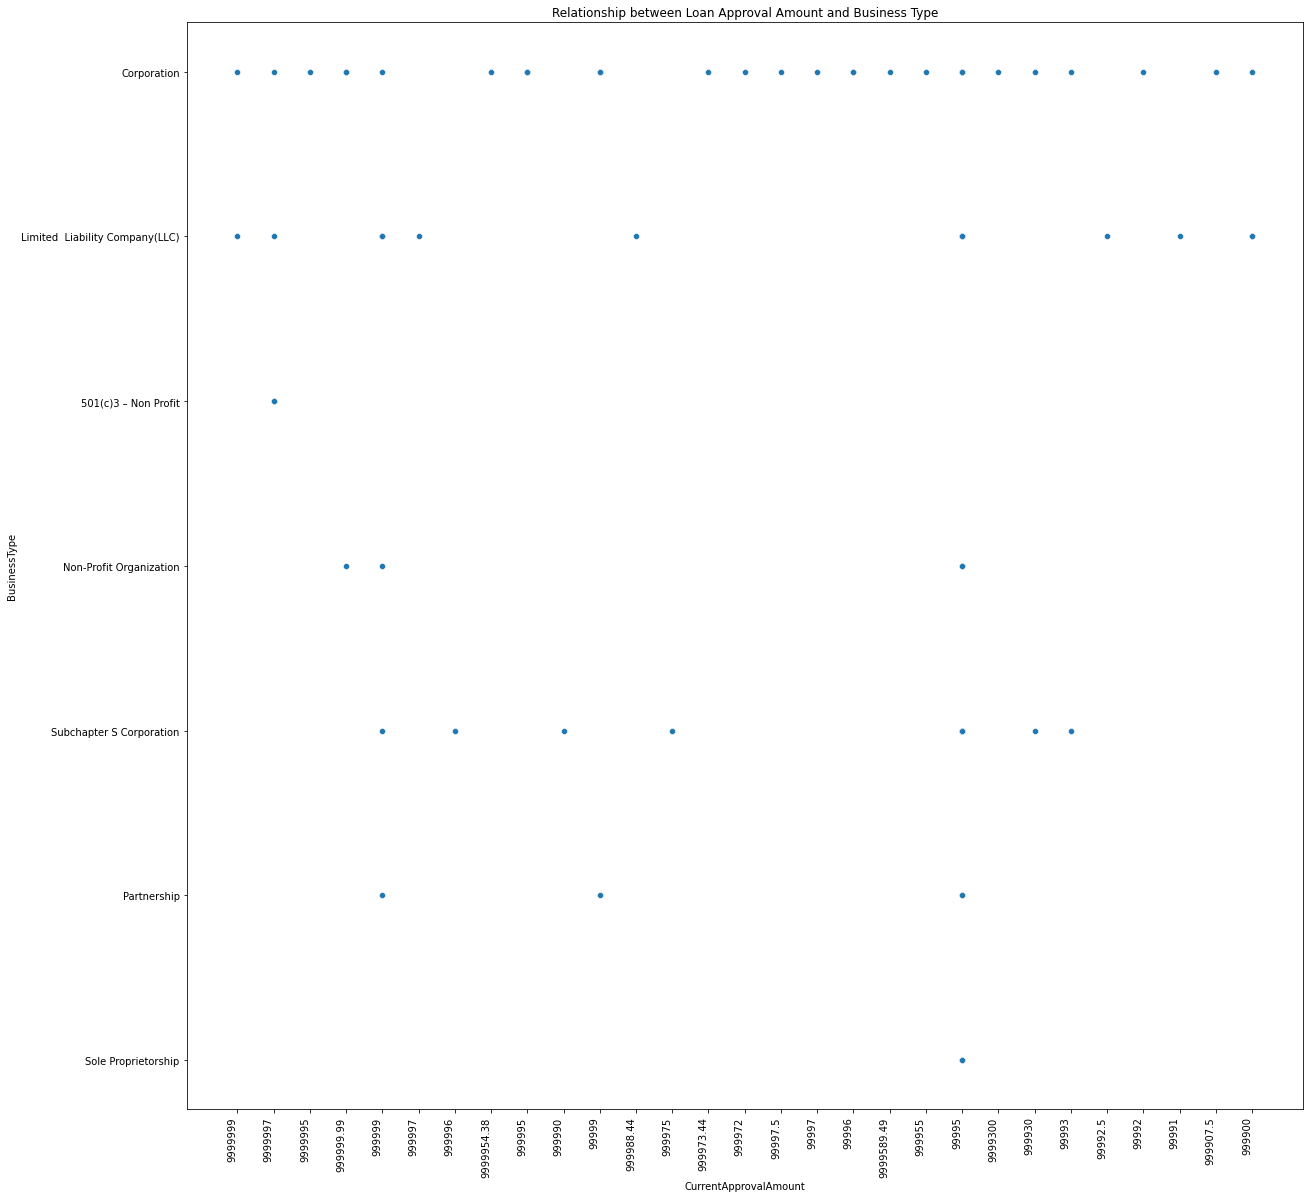

In [ ]:
#select parameters businees type and approval amount which is ordered by approved funds. Display the scatterpot 
#to find relationship between both
import matplotlib.pyplot as plt


ppp_data_filtered = df.select("BusinessType", "CurrentApprovalAmount", "ZCTA5") \
                      .orderBy("CurrentApprovalAmount", ascending = False) \
                      .limit(100)

ppp_data_filtered.show()

plt.figure(figsize=(20,20))
sns.scatterplot(data=ppp_data_filtered.toPandas(), x="CurrentApprovalAmount", y="BusinessType")
plt.title("Relationship between Loan Approval Amount and Business Type")
plt.xticks(rotation=90, ha='right')
plt.show()




Here we try to find the types of businesses which lend the most munny and understand the trends. It is clear that  corporations not only lent the biggest amounts but are spread out through all amounts , LLC's and subchapter corporations are also spread out but they are not very prevalent in the higher ranges. Induvidual contractors seem to be the most absent in borrowing higher amounts followed by self employed induviduals.

## (8) Optional extra credit for +10 points. What are the Top 10 zipcodes that had the highest per capita amount of loans going to Women-Owned businesses?

This column is called `Gender` in the `PPP` data.

* What State are these zipcodes in? 
* Comment on if they have anything in common? 

In [ ]:
#select zipcodes which are not null and female owned . 
#find the zipcodes in descending order of summation of approved funds
(df
 .where("Gender == 'Female Owned'")\
 .where("ZCTA5 is not null")\
 .where("BorrowerState is not null")\
 .withColumn("CurrentApprovalAmount", df.CurrentApprovalAmount.cast("float"))\
 .groupby(["BorrowerState", "ZCTA5"])\
 .agg(F.sum("CurrentApprovalAmount").alias("TotLoanAmt"))\
 .orderBy("TotLoanAmt", ascending = False).show(10, truncate = False))

+-------------+-----+--------------------+
|BorrowerState|ZCTA5|TotLoanAmt          |
+-------------+-----+--------------------+
|AZ           |86409|2.4837696E7         |
|NY           |10018|2.38916820625E7     |
|NY           |10012|1.47100295E7        |
|NY           |11354|1.3405267E7         |
|CA           |92101|1.3393197380859375E7|
|TX           |75024|1.23005725E7        |
|MI           |48075|1.1907094E7         |
|PR           |00907|1.1309088984375E7   |
|NY           |10001|1.1241899015625E7   |
|LA           |70354|1.09348E7           |
+-------------+-----+--------------------+
only showing top 10 rows



# 🔴 Conclusion (5 pts)

## (1) What did you learn? 
Write five detailed bullets about what you learned. 

1. We learned how we need to sample the data to make scatterplots run. Initially we tried to plot amounts for all zipcodes but the execution kept failing. Upon selecting the first 100 we were successful in getting results

2. We learned that we can perform multiple aggregations in the same query.

3. We learned the use of for statements to access all columns, upon starting we faced quite a few syntax and scope errors
4. We understood the need of typecasting when performing operations on columns. Question 5 required the column data types to be converted to double to get the right answers
5. We learned the nuances of plots in matplotlib. For instance the labels of y axis needed to be rotated 90 degrees so that the graph could be more readable

# On Your Own (no credit)
No points - but can you download ALL files for PPP data (several gigabytes of data) and re-run this script with ease? Post on the discussion board if you do!